In [1]:
from ema_workbench import load_results
from SALib.analyze import sobol
from ema_workbench.em_framework.salib_samplers import get_SALib_problem
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from vadere_ema_formulations import get_vadere_formulation


/home/tevito/anaconda3/envs/CrowdSim/lib/python3.10/site-packages/ema_workbench-2.1.3-py3.10.egg/ema_workbench/connectors/__init__.py:19: ImportWarning: vensim connector not available
  warnings.warn("vensim connector not available", ImportWarning)
<frozen importlib._bootstrap>:914: ImportWarning: ShimImporter.find_spec() not found; falling back to find_module()
/home/tevito/anaconda3/envs/CrowdSim/lib/python3.10/site-packages/ema_workbench-2.1.3-py3.10.egg/ema_workbench/connectors/__init__.py:29: ImportWarning: netlogo connector not available
  warnings.warn("netlogo connector not available", ImportWarning)
/home/tevito/anaconda3/envs/CrowdSim/lib/python3.10/site-packages/ema_workbench-2.1.3-py3.10.egg/ema_workbench/connectors/__init__.py:34: ImportWarning: simio connector not available
  warnings.warn("simio connector not available", ImportWarning)
<frozen importlib._bootstrap>:914: ImportWarning: ShimImporter.find_spec() not found; falling back to find_module()


In [2]:
model = get_vadere_formulation(
    id=1,
    replications=1,
    model_file='baseCaseData.scenario'
)

In [3]:
experiments, outcomes = load_results('../data/output/EMA/sobol.tar.gz')

In [35]:
def get_sobol_results(outcome):
    problem = get_SALib_problem(model.uncertainties)
    Si = sobol.analyze(problem, outcomes[outcome],
                   calc_second_order=True, print_to_console=False)
    print(Si)
    
    scores_filtered = {k:Si[k] for k in ['ST','ST_conf','S1','S1_conf']}
    Si_df = pd.DataFrame(scores_filtered, index=problem['names'])

    sns.set_style('white')
    fig, ax = plt.subplots(1)

    indices = Si_df[['S1','ST']]
    err = Si_df[['S1_conf','ST_conf']]

    indices.plot.bar(yerr=err.values.T,ax=ax).legend(loc="upper left")
    fig.set_size_inches(8,6)
    fig.subplots_adjust(bottom=0.3)
    ax.set_xlabel('Variable')
    ax.set_ylabel('Indices')
    plt.title(outcome)
    plt.show()
    return Si_df

In [5]:
def get_sobol_convergence(outcome, n_exp):
    problem = get_SALib_problem(model.uncertainties)
    s_data = pd.DataFrame(index=problem['names'],
                        columns=np.arange(20,n_exp,50)*(2*problem['num_vars']+2))
    for j in s_data.columns:
        scores = sobol.analyze(problem, outcomes[outcome][0:j], calc_second_order=True, print_to_console=False)
        s_data.loc[:,j] = scores['ST']
    fig, ax = plt.subplots(1)

    s_data.T.plot(ax=ax)
    ax.set_xlabel('Samples')
    ax.set_ylabel('Total index (ST)')
    plt.show()

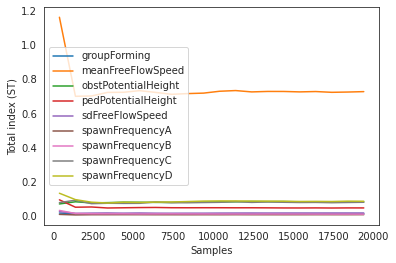

In [23]:
get_sobol_convergence('meanSpeed', 1000)

{'S1': array([-0.00083304,  0.01112143,  0.00406772, -0.00120093, -0.00315141,
        0.4724303 ,  0.00388037, -0.00561808,  0.43120331]), 'S1_conf': array([0.00954359, 0.01566581, 0.02309105, 0.01637944, 0.00782655,
       0.06333143, 0.00780888, 0.00797816, 0.0607531 ]), 'ST': array([0.01239546, 0.03707761, 0.03440182, 0.03047547, 0.01158303,
       0.50577678, 0.00939932, 0.00959353, 0.47308184]), 'ST_conf': array([0.00177079, 0.00689077, 0.00682744, 0.00541905, 0.00168225,
       0.04789   , 0.00115337, 0.00112438, 0.0449779 ]), 'S2': array([[        nan,  0.00100907,  0.00014152,  0.00487568,  0.00110966,
         0.0083341 ,  0.00150161,  0.00186524,  0.00310616],
       [        nan,         nan, -0.00077567,  0.00310706, -0.00031493,
         0.00256038,  0.00086533, -0.0004858 ,  0.00962474],
       [        nan,         nan,         nan,  0.01861315,  0.01165563,
         0.01021652,  0.01478234,  0.01478489,  0.02881864],
       [        nan,         nan,         nan,      

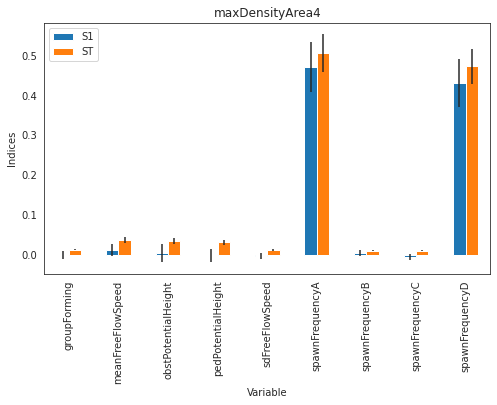

,ST,ST_conf,S1,S1_conf
groupForming,0.012395,0.001771,-0.000833,0.009544
meanFreeFlowSpeed,0.037078,0.006891,0.011121,0.015666
obstPotentialHeight,0.034402,0.006827,0.004068,0.023091
pedPotentialHeight,0.030475,0.005419,-0.001201,0.016379
sdFreeFlowSpeed,0.011583,0.001682,-0.003151,0.007827
spawnFrequencyA,0.505777,0.047890,0.472430,0.063331
spawnFrequencyB,0.009399,0.001153,0.003880,0.007809
spawnFrequencyC,0.009594,0.001124,-0.005618,0.007978
spawnFrequencyD,0.473082,0.044978,0.431203,0.060753


In [36]:
get_sobol_results('maxDensityArea4')